# De wetenschap achter het winnen van een tenniswedstrijd

Studenten: Robin Flier, Casper Smeets, Sjoerd Takken, Jip Voshol

Team nummer: G3

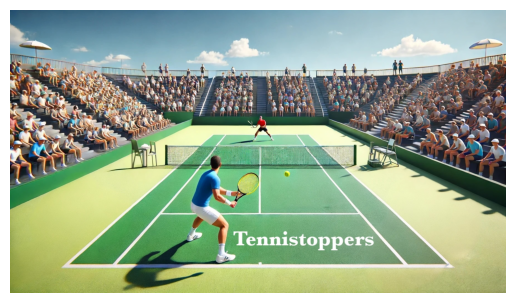

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

# Voer het pad naar je afbeelding in
image_path = '../images/tennisveld.jpg'

# Open de afbeelding met Pillow
image = Image.open(image_path)

# Gebruik matplotlib om de afbeelding te tonen
plt.imshow(image)
plt.axis('off')  # Verberg de assen
plt.show()



## Introductie

In de wereld van tennis wordt succes vaak afgemeten aan overwinningen en prestaties op het veld. De weg naar een overwinning is echter een complexe mix van zowel aangeboren als aangeleerde eigenschappen. Tennis, een sport waarbij zowel fysieke bekwaamheid als mentale weerbaarheid centraal staan, biedt een rijke dataset om te onderzoeken welke factoren de uitkomsten van wedstrijden beïnvloeden. Dit project verdeelt deze factoren in twee categorieën: aangeboren eigenschappen en aangeleerde vaardigheden.

Aangeboren eigenschappen omvatten kenmerken zoals afkomst, leeftijd, speelhand en lichaamslengte. Deze factoren zijn inherent aan de speler en niet beïnvloedbaar door training of ervaring. Hoewel deze eigenschappen op het eerste gezicht misschien een vaste rol spelen, zullen we onderzoeken in hoeverre ze de prestaties op het veld echt beïnvloeden.

Aan de andere kant staan de aangeleerde eigenschappen: vaardigheden en tactieken die spelers kunnen ontwikkelen door training en wedstrijdervaring. Hier kijken we naar aspecten zoals het aantal aces, de tijdsduur van de wedstrijd en het aantal dubbele fouten. Deze elementen zijn cruciaal omdat ze directe indicatoren zijn van zowel technische bekwaamheid als mentale scherpte tijdens de wedstrijd.

Onze analyse zal deze variabelen zowel afzonderlijk als in combinatie bestuderen om te bepalen welke het meest bepalend zijn voor succes in tenniswedstrijden. We zullen ook de verschillen tussen mannen en vrouwen in deze aspecten verkennen, om eventuele unieke strategieën of trends in speelstijlen te identificeren die kunnen verschillen per geslacht.

## Dataset en Preprocessing

<strong>De code verwerkt twee verschillende tennis datasets (ATP voor mannen en WTA voor vrouwen), combineert ze en slaat de gecombineerde dataset op</strong>. 

<i>De stappen zijn als volgt</i>: 

1. <b>Datasets laden</b>: De ATP- en WTA-datasets worden ingeladen vanuit CSV-bestanden. 

2. <b>Preprocessingsfunctie definiëren</b>: 
- Kolommen verwijderen: Bepaalde (belangrijke) kolommen die voor een erg groot deel ontbreken, worden verwijderd. 
- Datum conversie: De kolom 'tourney_date' wordt omgezet naar een datetime-formaat.
 - Verwijderen van rijen met ontbrekende waarden: Rijen met ontbrekende waarden in de kolommen 'winner_age', 'loser_age', 'winner_ht' of 'loser_ht' worden verwijderd.
 - Leeftijdskolommen omzetten: De 'winner_age' en 'loser_age' kolommen worden omgezet naar numerieke waarden, waarbij eventuele komma's worden vervangen door punten. 
- Geslachtskolom toevoegen: Een nieuwe kolom 'gender' wordt toegevoegd aan de dataset zodat de twee datasets kunnen worden gecombineerd, maar tegelijkertijd de onderscheid tussen man/vrouw gemaakt kan worden.

3. <b>Functie toepassen</b>: De preprocessingsfunctie wordt toegepast op zowel de ATP- als de WTA-dataset. Daarnaast bestond de WTA dataset alleen uit wedstrijden uit 2022, terwijl de ATP meerdere jaren bevatte. We hebben ervoor gekozen die dataset ook te beperken tot het jaar 2022. Verder waren de datasets wat betreft de kolommen zeer gelijk, dus geschikt om te combineren.

4. <b>Datasets combineren</b>: De schoongemaakte ATP- en WTA-datasets worden gecombineerd tot één dataset.

5. <b>Gecombineerde dataset opslaan</b>: De gecombineerde dataset wordt opgeslagen in een nieuw CSV-bestand.


## Eerste perspectief: lichamelijke kenmerken

Het eerste perspectief geeft inzicht in de relatie tussen lichamelijke kenmerken van sporters en hun winkansen. Tennis is een sport die niet alleen techniek en tactiek vereist, maar de fysieke gesteldheid van een speler speelt ook een aanzienlijke rol. We zullen kijken naar lichamelijke kenmerken binnen deze fysieke gesteldheid zoals de lengte van de speler, de voorkeurshand, afkomst en leeftijd. Deze variabelen zullen vervolgens vergeleken worden met de wedstrijdresultaten om te kijken wat de optimale lichamelijke waardes zijn voor het winnen van een wedstrijd.

De lengte van een speler is een variabele dat vaak onderzocht wordt. Lengte kan namelijk verschillende voordelen bieden zoals een betere bereikbaarheid van ballen en een hogere snelheid bij services. Langere mensen hebben zo bijvoorbeeld ook een grotere kracht bij het slaan van een bal. Kortere mensen kunnen echter ook een voordeel hebben door de wendbaarheid die handig kan zijn bij onverwachtse ballen. Uitkomsten van dit verband kunnen inzicht geven in welke lengte optimaal is voor het winnen van een wedstrijd.



Argumenten:
1. lengte 
2. afkomst
3. slagarm
4. leeftijd

### Eerste argument eerste perspectief: lengte

Uitkomsten van de data hebben een relevantie om specifieke spelers te scouten die aan de meest optimale eisen voldoen. De kans om deze speler uit te laten groeien tot prof is dan een stuk groter.

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random


# Load the dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')


# Set the style for seaborn
sns.set(style="whitegrid")

De speelondergrond speelt vaak een grote rol bij het verloop van een tenniswedstijd. In deze plot is te zien hoe de speelondergrond het aantal aces per wedstrijd beïnvloed. Zo valt er te zien dat er op een grasondergrond gemiddeld de meeste aces per wedstijd worden geslagen en dat er op grind gemiddeld de minste aces worden geslagen.

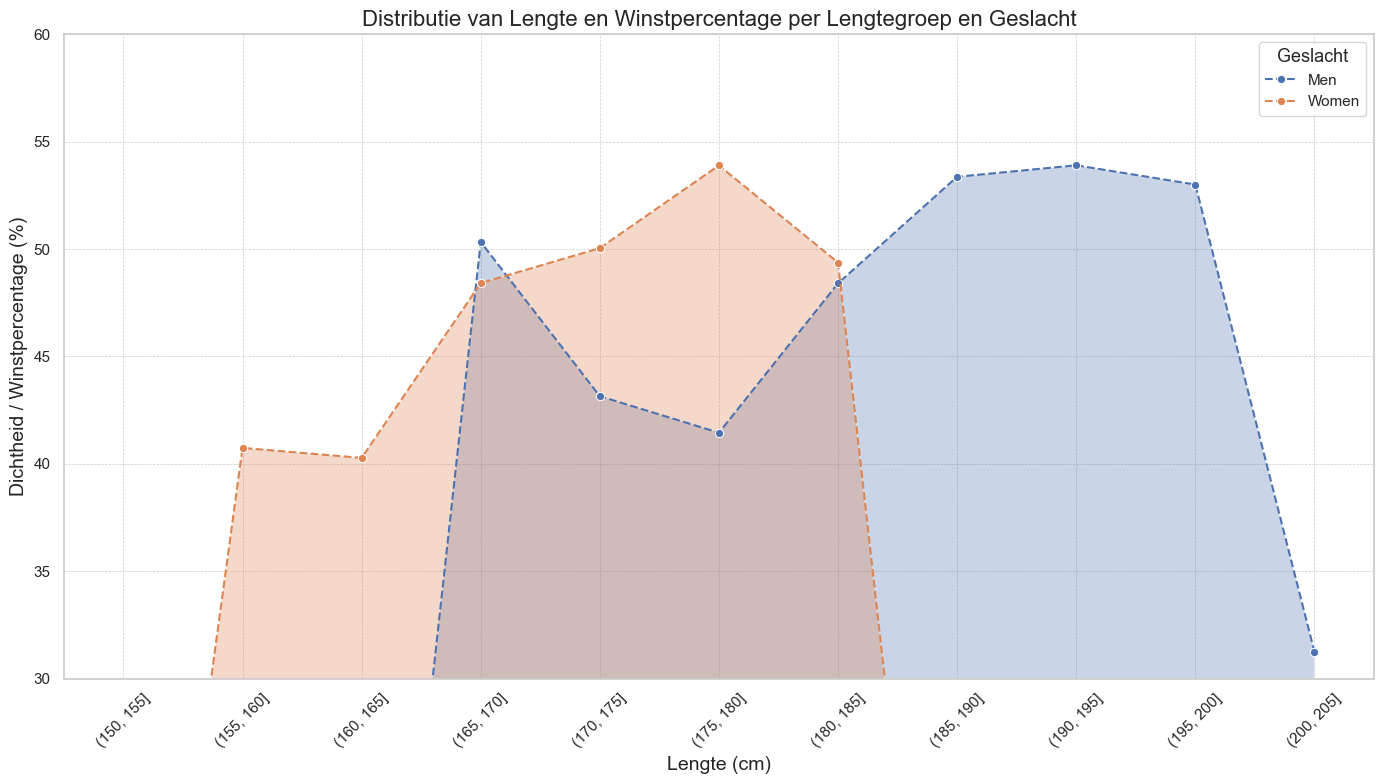

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Laad de dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Controleer op ontbrekende waarden in de kolommen 'winner_ht' en 'loser_ht'
df = df.dropna(subset=['winner_ht', 'loser_ht'])

# Combineer de lengtekolommen voor winnaars en verliezers en voeg een kolom voor geslacht en resultaat toe
winner_heights = df[['winner_ht', 'gender']].rename(columns={'winner_ht': 'height'})
winner_heights['result'] = 'win'

loser_heights = df[['loser_ht', 'gender']].rename(columns={'loser_ht': 'height'})
loser_heights['result'] = 'loss'

# Combineer de twee dataframes
heights_df = pd.concat([winner_heights, loser_heights])

# Definieer lengtegroepen
height_bins = range(150, 210, 5)  # Van 150cm tot 210cm met stappen van 5cm
heights_df['height_group'] = pd.cut(heights_df['height'], bins=height_bins)

# Bereken de winstpercentages per lengtegroep en geslacht
win_loss_counts = heights_df.groupby(['height_group', 'gender', 'result'], observed=False).size().unstack(fill_value=0)
win_loss_counts['total'] = win_loss_counts['win'] + win_loss_counts['loss']
win_loss_counts['win_percentage'] = win_loss_counts['win'] / win_loss_counts['total'] * 100

# Reset index en converteer height_group naar string
win_loss_counts = win_loss_counts.reset_index()
win_loss_counts['height_group'] = win_loss_counts['height_group'].astype(str)

# Controleer op ontbrekende waarden in win_percentage
win_loss_counts['win_percentage'] = win_loss_counts['win_percentage'].fillna(0)

# Verwijder eventuele ontbrekende waarden in de kolommen 'height_group' en 'gender' in heights_df
heights_df = heights_df.dropna(subset=['height_group', 'gender'])

# Zorg ervoor dat height_group als string wordt behandeld in heights_df
heights_df['height_group'] = heights_df['height_group'].astype(str)

# Maak een nieuwe DataFrame voor de gecombineerde visualisatie
combined_df = heights_df.merge(win_loss_counts[['height_group', 'gender', 'win_percentage']], on=['height_group', 'gender'], how='left')

# Plot de gecombineerde grafiek
plt.figure(figsize=(14, 8))

# KDE plot voor lengteverdeling
sns.kdeplot(data=combined_df, x='height', hue='gender', common_norm=False, palette='coolwarm', fill=True, alpha=0.5)

# Lijnplot voor winstpercentages met opvulling
for gender in win_loss_counts['gender'].unique():
    gender_data = win_loss_counts[win_loss_counts['gender'] == gender]
    plt.fill_between(gender_data['height_group'], gender_data['win_percentage'], alpha=0.3)
    sns.lineplot(data=gender_data, x='height_group', y='win_percentage', label=gender, linestyle='--', marker='o')

plt.title('Distributie van Lengte en Winstpercentage per Lengtegroep en Geslacht', fontsize=16)
plt.xlabel('Lengte (cm)', fontsize=14)
plt.ylabel('Dichtheid / Winstpercentage (%)', fontsize=14)
plt.ylim(30, 60)  # Aangepast bereik van de y-as
plt.xticks(rotation=45)
plt.legend(title='Geslacht', title_fontsize='13', fontsize='11')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

Deze plot geeft de verdeling van de lengtes van mannelijke en vrouwelijke tennissers weer. Wat erg opvalt is dat het verschil tussen mannelijke en vrouwelijke tennisers overal erg klein is. Zowel mannelijke als vrouwelijke tennissers zijn vooral tussen de 1.75m en 1.85m lang.

### Tweede argument eerste perspectief: afkomst

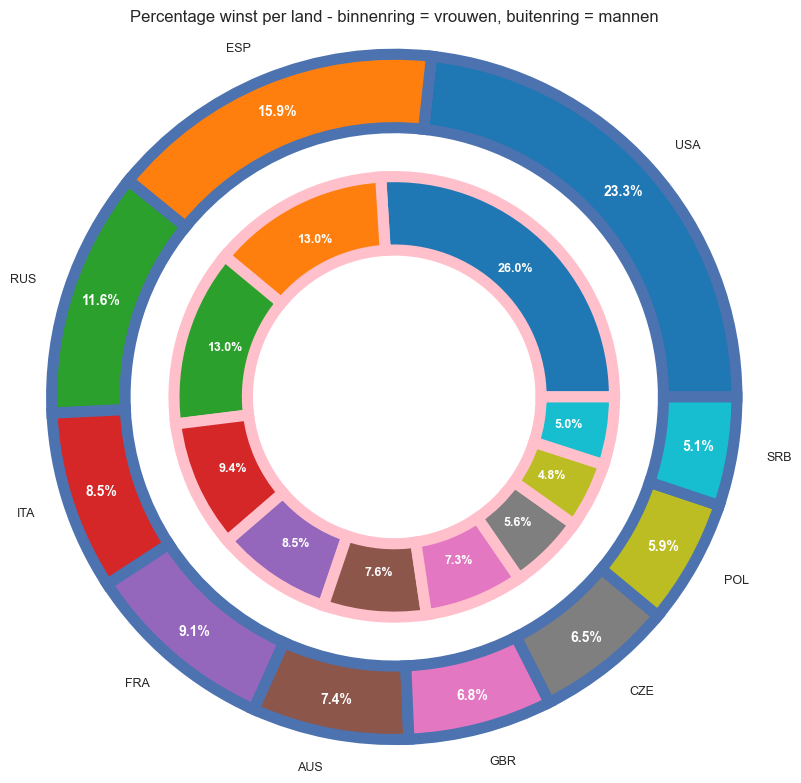

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data laden
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Simuleer geslachtsdata en winst/verlies
np.random.seed(0)
df['gender'] = np.random.choice(['Women', 'Men'], size=len(df))
df['result'] = np.random.choice(['win', 'loss'], size=len(df))

# Overwinningen per geslacht en land filteren
wins = df[(df['result'] == 'win')]

# Overwinningen per geslacht en land tellen
wins_per_country_gender = wins.groupby(['winner_ioc', 'gender']).size().unstack(fill_value=0)

# Top 10 landen met de meeste overwinningen selecteren
top_countries = wins_per_country_gender.sum(axis=1).nlargest(10).index
top_wins_per_country_gender = wins_per_country_gender.loc[top_countries]

# Kleurenpaletten
cmap = sns.color_palette("tab10", n_colors=20)

fig, ax = plt.subplots(figsize=(12, 8))

# Buitenste ring
wedges, texts, autotexts = ax.pie(top_wins_per_country_gender['Men'], radius=1.4, labels=top_wins_per_country_gender.index, colors=cmap, wedgeprops=dict(width=0.3, edgecolor='b', linewidth=8), autopct='%1.1f%%', pctdistance=0.9, labeldistance=1.1)
plt.setp(texts, size=9)
plt.setp(autotexts, size=10, weight="bold", color='white')

# Binnenste ring
wedges, texts, autotexts = ax.pie(top_wins_per_country_gender['Women'], radius=0.9, colors=cmap, wedgeprops=dict(width=0.3, edgecolor='pink', linewidth=8), autopct='%1.1f%%', pctdistance=0.8)
plt.setp(autotexts, size=9, weight="bold", color='white')

# Pas de titel en layout aan
ax.set(aspect="equal")
plt.title('Percentage winst per land - binnenring = vrouwen, buitenring = mannen', pad=50)
plt.tight_layout()
plt.show()

Figuur 2:

Dit figuur laat het winspercentage per land zien. Hier is weer te zien dat vooral grotere landen met meer inwoners het beter doen dan landen met minder inwoners. Ook valt het op dat de USA een veel hoger percentage heeft dan de rest, wat er op kan wijzen dat nationaliteit eventueel invloed kan hebben op de prestaties van de tennissers. Daarnaast is het nog interessant om te zien dat er soms grote verschillen zijn als we dan ook man en vrouw gaan vergelijken.

### Derde argument eerste perspectief: slagarm

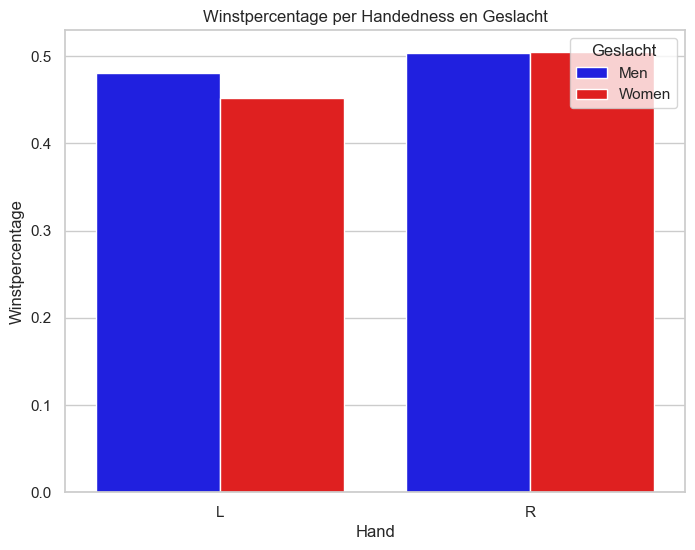

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laad de dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Filter de data om alleen wedstrijden te pakken waar links tegen rechts speelt
filtered_data = df[(df['winner_hand'].isin(['R', 'L'])) & (df['loser_hand'].isin(['R', 'L']))]

# Bereken winstpercentages voor 'R' en 'L' met een splitsing op geslacht
win_counts = filtered_data.groupby(['winner_hand', 'gender']).size()
total_matches_winner = filtered_data.groupby(['winner_hand', 'gender']).size()
total_matches_loser = filtered_data.groupby(['loser_hand', 'gender']).size()

# Voeg de totale wedstrijden van winnaars en verliezers samen voor een nauwkeurige berekening
total_matches = total_matches_winner.add(total_matches_loser, fill_value=0)

# Creëer een DataFrame voor winstpercentages
win_percentage = (win_counts / total_matches).reset_index(name='Winning Percentage')

# Plotten van de winstpercentages
plt.figure(figsize=(8, 6))
palette = {'Men': 'blue', 'Women': 'red'}  # Mannen in blauw, vrouwen in rood
sns.barplot(x='winner_hand', y='Winning Percentage', hue='gender', data=win_percentage, palette=palette, errorbar=None)

plt.title('Winstpercentage per Handedness en Geslacht')
plt.xlabel('Hand')
plt.ylabel('Winstpercentage')
plt.legend(title='Geslacht')

# Verwijder verticale gridlijnen
plt.grid(False)  # Schakelt alle grids uit
plt.gca().yaxis.grid(True)  # Schakel alleen het Y-grid in
plt.gca().xaxis.grid(False)  # Zorgt ervoor dat X-grid uitgeschakeld blijft

plt.show()

Figuur 3:

Het is ook erg interessant om te onderzoeken of de hand waarmee de tennissers slaan invloed heeft op hun resultaten. In dit figuur wordt er gekeken naar een relatie tussen de voorkeurshand van mannelijke en vrouwelijke tennissers en hun winspercentages. Wat opvalt is dat rechtshandige mannen en vrouwen gemiddeld een hoger winstpercentage hebben dan linkshandigen.

### Vierde argument eerste perspectief: leeftijd

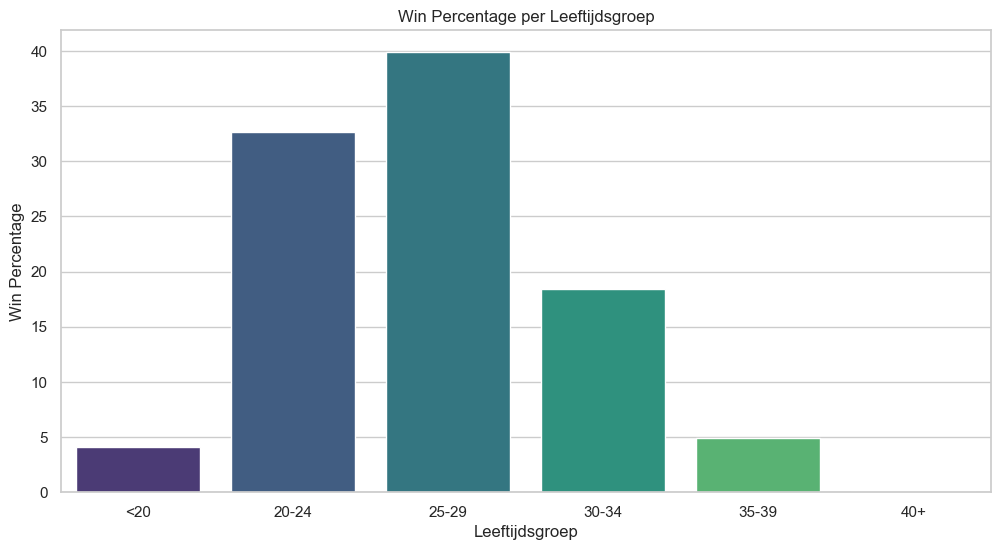

In [14]:
# Voeg leeftijdsgroepen toe
age_bins = [0, 20, 25, 30, 35, 40, 100]
age_labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40+']
df['winner_age_group'] = pd.cut(df['winner_age'], bins=age_bins, labels=age_labels, right=False)
df['loser_age_group'] = pd.cut(df['loser_age'], bins=age_bins, labels=age_labels, right=False)

# Win Percentage by Age Group
win_percentage_by_age_group = df['winner_age_group'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=win_percentage_by_age_group.index, y=win_percentage_by_age_group.values, palette='viridis', hue=win_percentage_by_age_group.index)
plt.title('Win Percentage per Leeftijdsgroep')
plt.xlabel('Leeftijdsgroep')
plt.ylabel('Win Percentage')
plt.show()

Figuur 4:

De leeftijd van een topsporter speelt vaak een grote rol bij de resultate die deze topsporter behaald. In deze plot is de hoogte van het winstpercentage van diverse leeftijdgroepen te zien. Hieruit kan opgemaakt worden dat tennissers vaak tussen de leeftijden 25-29 op de top van hun kunnen zijn.

## Tweede perspectief

Bij het tweede perspectief richten we ons op de winkansen van tennisspelers door een analyse van kenmerken die door training beïnvloed kunnen worden. Het doel is om te identificeren welke trainbare variabelen een significante invloed hebben op de uitkomst van wedstrijden. We focussen ons op statistieken zoals speelduur, aantal aces, aantal dubbele fouten, en het percentage eerste services die in zijn. Deze variabelen zijn essentieel omdat ze direct gerelateerd zijn aan de vaardigheden en voorbereiding van de spelers.

We gaan deze gegevens gebruiken om te ontdekken welke trainingselementen echt het verschil maken in wedstrijden. Dit is niet alleen handig voor coaches en spelers om hun trainingen beter te plannen, maar geeft ons ook meer inzicht in hoe bepaalde oefeningen bijdragen aan succes op de baan. Uiteindelijk kan dit onderzoek leiden tot slimmere trainingsplannen die spelers helpen beter te presteren en vaker te winnen.

### Eerste argument tweede perspectief

Het is belangrijk om te weten welke trainbare facetten bevorderend zijn voor het winnen van een tenniswedstrijd. Dit kan ervoor zorgen dat er op specifieke dingen getraind kan worden om te verbeteren.

argumenten:
1. aces en dubbele fouten
2. breakpunten mentaal aspect 

In [22]:
import pandas as pd
import plotly.express as px
import numpy as np

data = pd.read_csv('../combined_cleaned_tennis_data.csv')

grouped_winnaars = data.groupby(['w_ace', 'w_df']).size().reset_index(name='frequency')
grouped_verliezers = data.groupby(['l_ace', 'l_df']).size().reset_index(name='frequency')

grouped_winnaars['adjusted_size'] = np.sqrt(grouped_winnaars['frequency']) * 10 / (1 + 0.1 * grouped_winnaars['w_ace'] + 0.1 * grouped_winnaars['w_df'])
grouped_verliezers['adjusted_size'] = np.sqrt(grouped_verliezers['frequency']) * 10 / (1 + 0.1 * grouped_verliezers['l_ace'] + 0.1 * grouped_verliezers['l_df'])

fig_winnaars = px.scatter(grouped_winnaars,
                          x='w_ace',
                          y='w_df',
                          size='adjusted_size',
                          color='frequency',
                          hover_data={'frequency': True, 'w_ace': True, 'w_df': True, 'adjusted_size': False},
                          title='Bubble Plot Aces vs. Dubbele Fouten (Winnaars)',
                          labels={'w_ace': 'Aantal Aces', 'w_df': 'Aantal Dubbele Fouten', 'frequency': 'Frequentie'},
                          size_max=22,
                          opacity=0.8,
                          color_continuous_scale=px.colors.sequential.Viridis)

fig_winnaars.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_winnaars.update_layout(plot_bgcolor='white', 
                           xaxis=dict(title='Aantal Aces', range=[-1, 41]),
                           yaxis=dict(title='Aantal Dubbele Fouten', range=[-1, 21]),
                           margin=dict(l=20, r=20, t=60, b=20))

fig_verliezers = px.scatter(grouped_verliezers,
                            x='l_ace',
                            y='l_df',
                            size='adjusted_size',
                            color='frequency',
                            hover_data={'frequency': True, 'l_ace': True, 'l_df': True, 'adjusted_size': False},
                            title='Bubble Plot Aces vs. Dubbele Fouten (Verliezers)',
                            labels={'l_ace': 'Aantal Aces', 'l_df': 'Aantal Dubbele Fouten', 'frequency': 'Frequentie'},
                            size_max=22,
                            opacity=0.8,
                            color_continuous_scale=px.colors.sequential.Viridis)

fig_verliezers.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_verliezers.update_layout(plot_bgcolor='white', 
                             xaxis=dict(title='Aantal Aces', range=[-1, 41]),
                             yaxis=dict(title='Aantal Dubbele Fouten', range=[-1, 21]),
                             margin=dict(l=20, r=20, t=60, b=20))

fig_winnaars.show()
fig_verliezers.show()

Figuur 5: Het is erg interessant om te kijken naar de relatie tussen het aantal geslagen aces en het aantal dubbele fouten. 
Het proberen te slaan van een ace is namelijk erg risicovol en zal kunnen leiden tot het maken van een foute opslag. Uit het figuur valt op te maken dat er wel degelijk een relatie is tussen beide. Zo is er te zien dat een laag aantal aces, dus weinig risio,
in heel veel gevallen ook leidt tot een laag aantal dubbele fouten. De meest voorkomende combinaties zijn dan ook: 1 ace, 2 dubbele fouten (121 keer) en 1 ace, 1 dubbele fout (116 keer).

### Tweede argument tweede perspectief

In [5]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

# Laad het CSV-bestand
file_path = '../combined_cleaned_tennis_data.csv'
tennis_data = pd.read_csv(file_path)

# Converteer de relevante kolommen naar numeriek
tennis_data['w_bpSaved'] = pd.to_numeric(tennis_data['w_bpSaved'], errors='coerce')
tennis_data['w_bpFaced'] = pd.to_numeric(tennis_data['w_bpFaced'], errors='coerce')
tennis_data['l_bpSaved'] = pd.to_numeric(tennis_data['l_bpSaved'], errors='coerce')
tennis_data['l_bpFaced'] = pd.to_numeric(tennis_data['l_bpFaced'], errors='coerce')

# Bereken het percentage van gewonnen breakpoints
tennis_data['w_bpWinPercent'] = (tennis_data['w_bpSaved'] / tennis_data['w_bpFaced']) * 100
tennis_data['l_bpWinPercent'] = (tennis_data['l_bpSaved'] / tennis_data['l_bpFaced']) * 100

fig_box = px.box(
    tennis_data.melt(value_vars=['w_bpWinPercent', 'l_bpWinPercent'], var_name='Player', value_name='Win Percentage'),
    x='Player',
    y='Win Percentage',
    labels={'Player': 'Speler', 'Win Percentage': 'Winstpercentage Breakpoints (%)'},
    title='Vergelijking van Winstpercentage Breakpoints tussen Winnaars en Verliezers'
)
fig_box.update_xaxes(tickvals=['w_bpWinPercent', 'l_bpWinPercent'], ticktext=['Winnaars', 'Verliezers'])
fig_box.show()

Figuur 5:

Bovenstaande boxplot geeft de vergelijking weer tussen hoe vaak een breakpunt gewonnen wordt tussen de winnaar en verliezer van een wedstrijd. Hier is op de verticale as het winstpercentage te zien en op de horizontale as de speler. Uit de visualisatie blijkt dat de winnaar van de wedstijd relatief gezien vaker een breakpunt wint dan de verliezer. Het gemiddelde ligt bij de winnende partij een stuk hoger, wat aangeeft dat ze beter presteren onder druk.

Het spelen van een breakpunt is binnen tennis een punt waar veel spanning bij komt kijken. Het winnen van zo'n punt vereist dus een sterke mentale gesteldheid. Het mentaal sterker worden is iets wat getraind kan worden. Zodra dit goed getraind is, zal het percentage gewonnen breakpoint omhoog gaan bij de verliezende partij.

Dit mentale aspect kan getrained worden door tijdens training rustig voor te bereiden tijdens het spelen van een breakpunt, maar ook door met een sportpsycholoog te praken, oefenen in vergelijkbare spannende situaties en ademhalingsoefeningen. De winnende partij zit vaak beter in de wedstrijd op mentaal gebied waardoor de breakpunt ook vaker gewonnen zullen worden. 


##meer argument of toelichting##

In [ ]:
# code voor figuur 6


figuur 6


> *Figuur 6: Toelichting figuur*

## Reflectie

Zo vonden wij het project.

## Werkverdeling

### Samen
Dit hebben wij samen gedaan
### Sjoerd
Sjoerd heeft 
### Casper
Casper heeft
### Jip
Jip heeft zich bezig gehouden met het opschonen en samenvoegen van de datasets. Vanuit de dataset over de WTA heeft hij de bruikbare gegevens genomen van 2022 en deze bruikbaar gemaakt/samengevoegd met de dataset van de ATP. Hiermee is een grote dataset verkregen. Daarnaast is hij bezig geweest met het visualiseren van de inzichten.
### Robin
Robin heeft


## Referenties

Deze bronnen hebben wij gebruikt

## Appendix???

Generative AI (ChatGPT with GPT 3.5) is used to facilitate the creation of this document, as shown in the table below.

| Reasons of Usage | In which parts? | Which prompts were used? |
| ------------------------ | --------------------------------- | -------------------------------------------- |
| Brainstorm research questions and identify keywords for further search | The entire project framing | "Give keywords about the current debate in climate change with brief explanations" |
| Improve writing clarity and enhance readability | All sections | "Edit the following text to make it more clear. Do not alter the meaning." |
| Enhance readability | All sections | "Revise the paragraph to improve readability." |
| Ensure grammatical accuracy |  All sections | "Correct any grammatical errors in the text." |
| Provide alternative phrasing | Descriptions of the perspectives | "Suggest alternative phrases for better clarity." |
| Optimize sentence structure | All sections | "Restructure the sentence for better flow." |
| Condense lengthy sentences | All sections | "Simplify the following sentences without losing important information."|

> *Table 1: Usage of generative AI to facilitate the creation of this document.*